### experiments using IPC classes for originality 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

%matplotlib inline
%reload_ext line_profiler



In [2]:
%%time
# read in main data file in the Strata9 .dta format
cite76_06_df = pd.read_stata('cite76_06.dta')


CPU times: user 1.08 s, sys: 765 ms, total: 1.84 s
Wall time: 2.2 s


In [3]:
cite76_06_df.head()

citing    cited  ncites7606
0  5135226  3930271           6
1  5592695  3930271           6
2  5621918  3930271           6
3  5624296  3930271           6
4  5675839  3930271           6

In [4]:
# get the IPC classes in these backward citations
# Load  data file with inter_ etc

pat76_06_ipc_df = pd.read_csv('pat76_06_ipc_df_modified.csv')

In [5]:
# lets take a row for an example
n = 5000000
focal_patent = cite76_06_df[n:(n+1)].citing.values[0]
focal_patent

4692752

In [6]:
# get all backward citations for this focal patent
example_focal_patent = cite76_06_df[cite76_06_df.citing == focal_patent]
print(example_focal_patent)
# get list of backward citations
backward_citations = example_focal_patent.cited.values.tolist()
backward_citations

          citing    cited  ncites7606
697442   4692752  4010458           6
1396130  4692752  4087706          17
3542953  4692752  4319229          20
4555290  4692752  4422066          10
5000000  4692752  4465998           7
5496836  4692752  4514722          11
6244677  4692752  4586028           5


[4010458, 4087706, 4319229, 4422066, 4465998, 4514722, 4586028]

In [7]:
pat76_06_ipc_df.tail().T

4856176      4856177      4856178      4856179  \
appyear                2000         2000         2000         2000   
cat                       2            2            2            2   
gyear                  2006         2006         2006         2006   
icl              G06F 17/30   G06F 15/16    G06K 9/00    H04L 9/00   
icl_class              G06F         G06F         G06K         H04L   
icl_maingroup            17           15            9            9   
iclnum                    2            3            4            5   
nclass                  726          726          726          726   
numipc                    6            6            6            6   
patent              7155745      7155745      7155745      7155745   
pdpass          1.05552e+07  1.05552e+07  1.05552e+07  1.05552e+07   
subcat                   25           25           25           25   
subclass                 27           27           27           27   
uspto_assignee          NaN          NaN          NaN          NaN   
icl_uc           G06F 17/30   G06F 15/16    G06K 9/00    H04L 9/00   
icl_class_uc           G06F         G06F         G06K         H04L   
section                   G            G            G            H   
ipc_inter            G06F17       G06F15        G06K9        H04L9   

                    4856180  
appyear                2000  
cat                       2  
gyear                  2006  
icl               H04K 1/00  
icl_class              H04K  
icl_maingroup             1  
iclnum                    6  
nclass                  726  
numipc                    6  
patent              7155745  
pdpass          1.05552e+07  
subcat                   25  
subclass                 27  
uspto_assignee          NaN  
icl_uc            H04K 1/00  
icl_class_uc           H04K  
section                   H  
ipc_inter             H04K1

In [8]:
#  now using only the four character IPC4
blob = []
for citation in backward_citations:
    print(citation)
    temp_class = list(set(pat76_06_ipc_df[pat76_06_ipc_df.patent==citation].icl_class_uc.values))
    print(temp_class)
    blob.append(temp_class)

4010458
['G08B']
4087706
['H01H', 'G08B', 'H03K']
4319229
['G08B']
4422066
['H01N', 'G08B']
4465998
['G08B']
4514722
['G08B']
4586028
['G08B']


In [9]:
blob

[['G08B'],
 ['H01H', 'G08B', 'H03K'],
 ['G08B'],
 ['H01N', 'G08B'],
 ['G08B'],
 ['G08B'],
 ['G08B']]

In [10]:
# get sections of focal patent, for comparison
pat76_06_ipc_df[pat76_06_ipc_df.patent==focal_patent].icl_class_uc.values

array(['G08B'], dtype=object)

In [11]:
## calculate originality of this patent
number_backward_citations = len(blob)
print('number backward citations = ',number_backward_citations)
# create single list by flattening through numpy concat
flat_list = list(np.concatenate(blob))
print('flat_list = ',flat_list)
# get number of each unique element in this list
unique_elements = list(set(flat_list))
print('unique_elements = ',unique_elements)
zz = [(flat_list.count(i)) for i in set(flat_list) ]

# do the sume of squares for unoriginality
sum = 0
for item in zz:
    print('item = ',item)
    zzz = pow((item/number_backward_citations),2)
    print('zzz = ',zzz)
    sum = sum+zzz
    print('sum = ',sum)
unoriginality = sum
print('unoriginality = ',unoriginality)
originality_focal_patent = 1 - unoriginality
originality_focal_patent

number backward citations =  7
flat_list =  ['G08B', 'H01H', 'G08B', 'H03K', 'G08B', 'H01N', 'G08B', 'G08B', 'G08B', 'G08B']
unique_elements =  ['H01H', 'H01N', 'G08B', 'H03K']
item =  1
zzz =  0.02040816326530612
sum =  0.02040816326530612
item =  1
zzz =  0.02040816326530612
sum =  0.04081632653061224
item =  7
zzz =  1.0
sum =  1.0408163265306123
item =  1
zzz =  0.02040816326530612
sum =  1.0612244897959184
unoriginality =  1.0612244897959184


-0.061224489795918435

In [12]:
## calculate originality of this patent, made into a function
def get_class_originality(focal_patent):
    example_focal_patent = cite76_06_df[cite76_06_df.citing == focal_patent]
    # print(example_focal_patent)
    # get list of backward citations
    backward_citations = example_focal_patent.cited.values.tolist()
    backward_citations
    blob = []
    for citation in backward_citations:
        #print(citation)
        temp_class = list(set(pat76_06_ipc_df[pat76_06_ipc_df.patent==citation].section.values))
        #print(temp_class)
        blob.append(temp_class)
    
    number_backward_citations = len(blob)
    #print('number backward citations = ',number_backward_citations)
    # create single list by flattening through numpy concat
    flat_list = list(np.concatenate(blob))
    #print('flat_list = ',flat_list)
    # get number of each unique element in this list
    unique_elements = list(set(flat_list))
    #print('unique_elements = ',unique_elements)
    zz = [(flat_list.count(i)) for i in set(flat_list) ]

    # do the sum of squares for unoriginality
    sum = 0
    for item in zz:
        #print('item = ',item)
        zzz = pow((item/number_backward_citations),2)
        #print('zzz = ',zzz)
        sum = sum+zzz
        #print('sum = ',sum)
    unoriginality = sum
    #print('unoriginality = ',unoriginality)
    originality_focal_patent = 1 - unoriginality
    return(originality_focal_patent)

In [13]:
## calculate sctions in this patent,  a function
def get_class_count(focal_patent):
    example_focal_patent = cite76_06_df[cite76_06_df.citing == focal_patent]
    # print(example_focal_patent)
    # get list of backward citations
    backward_citations = example_focal_patent.cited.values.tolist()
    accumulator = []
    for citation in backward_citations:
        #print(citation)
        temp_classes = list(set(pat76_06_ipc_df[pat76_06_ipc_df.patent==citation].icl_class_uc.values))
        #print(temp_class)
        accumulator.append(temp_classes)
    
    number_backward_citations = len(accumulator)
    #print('number backward citations = ',number_backward_citations)
    # create single list by flattening through numpy concat
    flat_list = list(np.concatenate(accumulator))
    #print('flat_list = ',flat_list)
    # get number of each unique element in this list
    num_unique_elements = len(set(flat_list))
    #print('unique_elements = ',unique_elements)
    return(num_unique_elements)

In [15]:
j=7155745
%lprun -f get_class_count(j) xx= get_class_count(j)
xx= get_class_count(j)
xx

/Users/ahuxor/anaconda/lib/python3.4/site-packages/line_profiler.py:294: UserWarning: Could not extract a code object for the object 8
  profile = LineProfiler(*funcs)


8

In [17]:
get_class_count(7155745)

8

In [18]:
pat76_06_assg_df = pd.read_stata('pat76_06_assg.dta')


In [19]:
pat76_06_assg_df.head().T

0            1           2          3          4
allcites                  6            0          20          4          1
appyear                1974         1974        1975       1974       1975
asscode                   2            2           2          1          1
assgnum                   1            1           1        NaN        NaN
cat                       6            6           6          5          6
cat_ocl                   6            6           6        NaN          6
cclass              2/161.4         5/11       5/430    114/354    12/142S
country                  US           US          US                      
ddate                   NaT          NaT         NaT        NaT        NaT
gday                      6            6           6          6          6
gmonth                    1            1           1          1          1
gyear                  1976         1976        1976       1976       1976
hjtwt                     1            1           1          1          1
icl               A41D 1900    A47D  701   A47D  702  B63B  708  A43D  900
icl_class              A41D         A47D        A47D       B63B       A43D
icl_maingroup            19            7           7          7          9
iclnum                    1            1           1          1          1
nclaims                   4            3          24          7          9
nclass                    2            5           5        114         12
nclass_ocl                2            5           5          9         12
patent              3930271      3930272     3930273    3930274    3930275
pdpass          1.00303e+07  1.01569e+07  1.0112e+07        NaN        NaN
state                    IL           PA          MO         CA         NJ
status                                                                    
subcat                   63           65          65         55         63
subcat_ocl               63           65          65        NaN         63
subclass              161.4           11         430        354        NaN
subclass1             161.4           11         430        354       142S
subclass1_ocl           161           11         331          2        142
subclass_ocl            161           11         331          2        142
term_extension            0            0           0          0          0
uspto_assignee       251415       246000       10490          0          0

In [113]:
cite76_06_df.head().T

0        1        2        3        4
citing      5135226  5592695  5621918  5624296  5675839
cited       3930271  3930271  3930271  3930271  3930271
ncites7606        6        6        6        6        6

In [119]:
sample_patents = cite76_06_df[1000000:1016000].citing.values.tolist()
len(sample_patents)

16000

In [120]:
len(cite76_06_df)

23650891

In [121]:
%%time

# works up to 14000 patents, with t=32 mins
patent_list = []
class_counts_list = []
num_forward_cites_list = []
for patent in sample_patents:
    xx = get_class_count(patent)
    patent_list.append(patent)
    class_counts_list.append(xx)
    num_forward_cites = pat76_06_assg_df[pat76_06_assg_df.patent == patent].allcites.values[0]
    num_forward_cites_list.append(num_forward_cites)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [118]:
# create dataframe from these lists
class_counts_df = pd.DataFrame(
    {'patent': patent_list,
     'number_of_classes': class_counts_list,
     'forward_citations': num_forward_cites_list
    })

In [116]:
class_counts_df.head()

forward_citations  number_of_classes   patent
0                 11                  4  4594177
1                 12                  5  4681790
2                  6                  3  5286263
3                 37                 11  5350795
4                 12                  8  5439610

/Users/ahuxor/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:36: RuntimeWarning: divide by zero encountered in log10


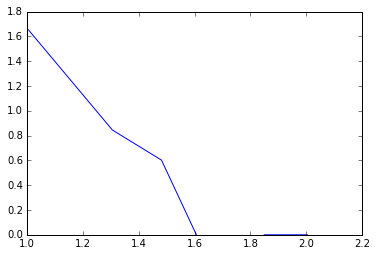

In [117]:
one_class=class_counts_df[class_counts_df.number_of_classes==1]
two_class=class_counts_df[class_counts_df.number_of_classes==2]
three_class=class_counts_df[class_counts_df.number_of_classes==3]
four_class=class_counts_df[class_counts_df.number_of_classes==4]
five_class=class_counts_df[class_counts_df.number_of_classes==5]
six_class=class_counts_df[class_counts_df.number_of_classes==6]
seven_class=class_counts_df[class_counts_df.number_of_classes==7]
eight_class=class_counts_df[class_counts_df.number_of_classes==8]

ten_class=class_counts_df[class_counts_df.number_of_classes==10]
eleven_class=class_counts_df[class_counts_df.number_of_classes==11]
twelve_class=class_counts_df[class_counts_df.number_of_classes==12]

fifteen_class=class_counts_df[class_counts_df.number_of_classes==15]



twenty_class=class_counts_df[class_counts_df.number_of_classes==20]
twentyone_class=class_counts_df[class_counts_df.number_of_classes==21]





#plot distribution of one section
counts,bins = np.histogram(twenty_class.forward_citations,bins=10)

slope_list = []
intercept_list = []
R_squared_list = []

x = bins[1:]
y = counts

logx = np.log10(x)
logy = np.log10(y)
plt.plot(logx,logy)

In [111]:
1.6/(1.6-1)

2.6666666666666665

In [112]:
class_counts_df[class_counts_df.number_of_classes==25]

forward_citations  number_of_classes   patent
372                    0                 25  7011865
421                    2                 25  6060410
432                    0                 25  6562743
1828                   6                 25  4938127
1829                   3                 25  4949628
1830                   3                 25  4957041
1831                   2                 25  4957042
1832                  10                 25  4960043
1833                   6                 25  4979434
1835                  16                 25  4984514
1836                  29                 25  4999208
1837                   3                 25  5015488
1838                   6                 25  5015489
1839                   6                 25  5015490
1840                   8                 25  5030468
1841                  11                 25  5071668
1844                  26                 25  5124161
1954                   3                 25  6245366
2165                   8                 25  5139887
2359                   2                 25  6858580
2368                   0                 25  7084121
3365                   6                 25  6822372
6606                   0                 25  6854163
6856                   6                 25  4938127
6857                   3                 25  4949628
6858                   3                 25  4957041
6859                   2                 25  4957042
6860                  10                 25  4960043
6861                   6                 25  4979434
6862                  16                 25  4984514
6863                  29                 25  4999208
6864                   3                 25  5015488
6865                   6                 25  5015489
6866                   6                 25  5015490
6867                   8                 25  5030468
6868                  11                 25  5071668
6871                  26                 25  5124161
7044                   7                 25  6120627
10584                  0                 25  6976986
11230                  0                 25  7077984
11437                  0                 25  6911243
12797                  0                 25  7023420

In [38]:
four_class

forward_citations  number_of_classes   patent
0                 11                  4  4594177

In [359]:
1.0/.8

1.25

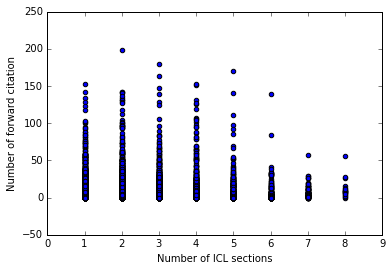

In [246]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlabel('Number of ICL sections')
ax.set_ylabel('Number of forward citation')
plt.scatter(sections_counts_list,num_forward_cites_list)


plt.savefig("/Users/ahuxor/MSc/Thesis_Project/msc_thesis/Figs/section_counts_citations_scatter.pdf", bbox_inches = 'tight')
plt.show()


In [ ]:
%%time
# works up to 5000 patents, with t=13 mins
patent_list = []
originality_list = []
num_forward_cites_list = []
for patent in sample_patents:
    xx = get_class_originality(patent)
    patent_list.append(patent)
    originality_list.append(xx)
    num_forward_cites = pat76_06_assg_df[pat76_06_assg_df.patent == patent].allcites.values[0]
    num_forward_cites_list.append(num_forward_cites)

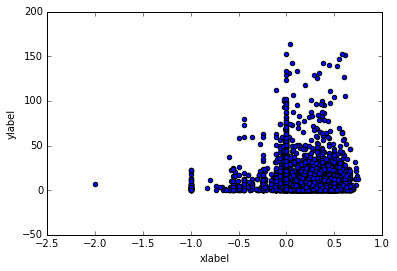

In [207]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')
plt.scatter(originality_list,num_forward_cites_list)


plt.savefig("/Users/ahuxor/MSc/Thesis_Project/msc_thesis/Figs/section_orig_citations_scatter.pdf", bbox_inches = 'tight')
plt.show()
